Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). On JupyterLab, you may want to hit the "Validate" button as well.

Caution: do not mess with the notebook's metadata; do not change a pre-existing cell's type; do not copy pre-existing cells (add new ones with the + button instead). This will break autograding; you will get a 0; you are warned.

<table style="width: 100%; border: none;" cellspacing="0" cellpadding="0" border="0">
  <tr>
    <td><img src="https://www.planetegrandesecoles.com/wp-content/uploads/2021/07/Identite%CC%81-visuelle-Plane%CC%80te-BAC-8-600x398.png" style="float: left; width: 100%" />
</td>
    <td><h1 style="text-align: center; vertical-align: middle;"><a href="https://moodle.polytechnique.fr/course/view.php?id=15585">[CSE204-2022] - Introduction to Machine Learning</a></h1>
</td>
  </tr>
</table>

---

# Lab Session 12 - Exam #2

Adrien Ehrhardt - Jesse Read

Groups C-D

## Overall presentation

1. Read these instructions carefully before commencing
2. Attempt as many questions as you can
3. Submit the Notebook on Moodle *before* the end of the lab session

This is an individual exam, and **any form of communication is not allowed** (exception: don't hesitate to ask the teaching coordinators if you have any question!)

This test is **restricted open book**: You may have any of (but nothing beyond) the following pdfs open relating to the cours material: lecture slides, lecture notes, and up to 10 pages of your own notes.

There are 7 questions; worth the number of points indicated, which corresponds roughly the amont of time required to complete them.

### Warnings about using the Notebook

There are examples of automatic tests that are run against your code. **They are not exhaustive nor sufficient** (we will run other - hidden - tests), **but they are necessary**: they have to pass, otherwise you can be sure *not* to get the points.

You **cannot** use past lab sessions' solutions, nor Google anything. The exam is open book w.r.t. the lectures. Some help and hints are provided for each question (e.g. which function to use and how), and you can also use the `help(...)` function.

- **Do not** delete any pre-existing cell (you can create and delete your own cells for testing).
- **Do not** change the type (Markdown / Code / ...) of any pre-existing cell.
- Run the notebook with the **CSE204** kernel -- if you didn't install it beforehand, proceed at your own risk.
- **Do not** rename the file when uploading your work on Moodle.
- **Do not** edit the notebook's or a cell's metadata.

### Hints:

* Questions are independent from each other, so don't hesitate to skip ahead if you get blocked on any particular question.

* Worth keeping in mind: do not panic! We try to make the test 'just right' but may err towards a bit too difficult. If it looks harder than you were expecting, simply complete as many questions as you can, and don't worry, we can always scale everyone up later. 

## Imports

In [1]:
import gc
import os
import json
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Input, Conv2D, Activation, Dropout, MaxPooling2D,\
    BatchNormalization, Flatten, UpSampling2D, Reshape
from tensorflow.keras.optimizers import SGD
import keras  # used in tests

## 1. Recurrent Neural Networks (15 pts)

We have not covered recurrent neural networks (RNNs) so far in class. But we have covered deep neural networks, and an RNN can be seen as a deep neural network. If you are able to train a simple CNN from scratch, you can surely train an RNN from scratch.

We'll consider the simplest RNN imaginable: 

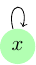

(A single unit; single trainable parameter, linear activation function.)

It works the same way as any neural network. Because of the loop the output becomes the input; and we can generate sequences of infinite or arbitrary length. Let us only consider that we generate a sequence of length 3 including the input. You can get the gist of how this works in the `predict` function of the `RNN` class below. Also consider that we *only evaluate the third item* in the sequence. So if we have target/label `t2`, and we seed the network with `x = x0`, and carry out a forward pass to depth 2 (by calling `predict`), then we expect the 3rd item in the generated sequence (`x2`) to be equal to target `t2`. Let our error metric be squared error: $0.5 * (x_2 - t_2)^2$ where $x_2$ the 3rd output, as shown by `error` in the code below.

**Task**: Train the RNN, by completing the `fit` function below. The gradient descent up date is already done for you (with a learning rate of `0.1`), so you just need to figure out the update `g` to be made.  

**Hints**: Just approach the problem as you would for training any neural network. The focus on this exercise is on the implementation of back propagation in the simplest context; you don't need to worry about vectors or matrices in this problem, you do not need to worry about overfitting, there is only a single training example, and a single trainable parameter, you just need to fit the model to this (or any other) training example, i.e., set the parameter `self.w` correctly; no bias term. It may help to imagine 'unrolling' the network (i.e., redrawing it with 3 nodes instead of 1), as so: 

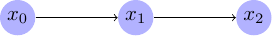

You can see that, from this view, it is almost a 'standard' neural network, *except having the same parameter `w` for each edge*.

In [155]:
class RNN(): 
    def __init__(self, w_init):
        ''' Set the initial weight.
        '''
        self.w = w_init

    def predict(self,x0):
        ''' Generate a 3d sequence seeded by x0.
        '''
        x1 = x0 * self.w
        x2 = x1 * self.w
        return [x0,x1,x2]

    def fit(self,x0,t2):
        ''' Train the model.
            Update w to increase the chances of producing a sequence ending in t2 when seeded by x0.
        '''
        # Forward pass
        [x0, x1, x2] = self.predict(x0)
        # TODO: Calculate the gradient, store it in g
        # YOUR CODE HERE
        g=((x0*self.w**2)-t2)*2*x0*self.w
        # Gradient descent update
        self.w = self.w - 0.01 * g
        return self

In [156]:
# Demonstrate the error *before* training

# input
x0 = 4
# 3rd output (target)
t2 = 1

# instantiate the network
rnn = RNN(0.45)
# forward pass
[x0, x1, x2] = rnn.predict(x0)
# inpspect the 3rd output, and calculate the error 
error = 0.5 * (x2 - t2)**2
print("The network (w=%3.2f) produced: [%3.2f,%3.2f,%3.2f] from input %3.2f. Error=%3.2f." % (rnn.w,x0,x1,x2,x0, error))

The network (w=0.45) produced: [4.00,1.80,0.81] from input 4.00. Error=0.02.


In [157]:
# Demonstrate the error *after* training for 100 epochs
for n_iterations in range(100):
    rnn.fit(x0, t2)
[x0, x1, x2] = rnn.predict(x0)
error = 0.5 * (x2 - t2)**2
print("The network (w=%3.2f) produced: [%3.2f,%3.2f,%3.2f] from input %3.2f. Error=%3.2f." % (rnn.w,x0,x1,x2,x0, error))

The network (w=0.50) produced: [4.00,2.00,1.00] from input 4.00. Error=0.00.


# 2. Decision Trees (15 pts)

Given the dataset `x,y` (as denoted below): 

**Task**: Find the best split point for the feature `x` using **mean squared error** as the **impurity measure**. 
and its associated impurity. Return these values, as indicated, in the partially-implemented function `find_best_split` below.  

**Hint**: If you know how this is supposed to work, but aren't having a good coding day, you can just do it 'by eye' and hard-code the function, for partial points. 

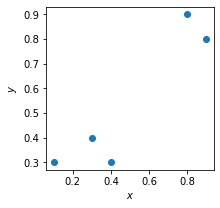

In [163]:
# make the dataset
x = np.array([0.1,0.3,0.4,0.8,0.9])
y = np.array([0.3,0.4,0.3,0.9,0.8])

# plot the dataset
plt.figure(figsize=[3,3])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x,y)
plt.show()

In [164]:
def find_best_split(x, y):
    """
    Find the best split point and its associated impurity for a given feature vector x and target vector y.

    Parameters:
    -----------
    x : numpy array of shape (n_samples,)
        The feature vector.
    y : numpy array of shape (n_samples,)
        The target vector.

    Returns:
    --------
    best_split : float
        The best split point.
    best_impurity : float
        The impurity of the best split point.
    """
    # Sort the feature vector in ascending order
    sorted_idx = np.argsort(x)
    sorted_x = x[sorted_idx]
    sorted_y = y[sorted_idx]

    # Calculate the impurity of the entire node (you need to change this value)
    node_impurity = np.mean((y-np.mean(y))**2)
    # YOUR CODE HERE

    # Initialize variables to keep track of the best split point and its associated impurity
    split_points = []
    split_impurities = []
    n=len(x)

    # Iterate over each possible split point
    for i in range(1, n):
        # YOUR CODE HERE
        mean_left, mean_right = np.mean(sorted_y[:i]), np.mean(sorted_y[i:])
        split_impurity = (i/n)*np.mean((sorted_y[:i] - mean_left)**2) + ((n-i)/n)*np.mean((sorted_y[i:] - mean_right)**2)
        split_points.append(sorted_x[i])
        split_impurities.append(split_impurity)
        
    i_best = np.argmin(split_impurities)
    print(i_best)
    return split_points[i_best], split_impurities[i_best]

2


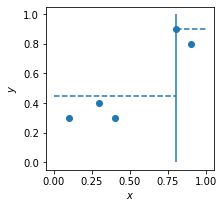

In [165]:
# Test your code
split_point, split_impurity = find_best_split(x,y)

mean_left = np.mean(y[y <= split_point])
mean_right = np.mean(y[y > split_point])

# Plot the dataset
plt.figure(figsize=[3,3])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x,y)
plt.vlines(split_point,0,1)
plt.hlines(mean_left,0,split_point,linestyle='dashed')
plt.hlines(mean_right,split_point,1,linestyle='dashed')
plt.show()

## 3. Ensembles (15 pts)

In ensembles, the general rule is 'more is better', but only under certain conditions. Have you understood how ensembles can reduce variance under squared error metrics (and thus, reduce the expected error)? 

**Task**: instantiate, and store in `H` 3 models that produce *lower expected mean-squared error* versus a single model *of the same type*, using no other scikit-learn functions other than `DecisionTreeRegressor` (you can hyper-parametrize it however you like; but that should not be needed).   

**Hint**: This exercise does *not* involve Boosting. A non-standard/imperfect implementation may still get full points; as long as you succeed in the task (it is only the error versus `h` that is being evaluated). `np.random.choice` could be useful. Don't forget to `fit` your models.

In [142]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu

In [122]:
np.random.seed(42)

# You only need to provide 3 estimators
n_estimators = 3

# Some simple/boring data 
X = np.random.randn(10,1) + 10
y = np.random.randn(10,1) * 1 + 1

# This is your competition (a standalone model)
h = DecisionTreeRegressor().fit(X,y)

In [127]:
# You need to fill the following array with n_estimators estimators 
# such that H[2].predict(x) returns the predictions of the 3rd estimator for input x.
H = []
n=X.shape[0]
for i in range(n_estimators):
    sample=np.random.choice(n,n,replace=True)
    X_train=X[sample]
    y_train=y[sample]
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
    H.append(model)

# YOUR CODE HERE

In [128]:
# This block is left blank, in case you want to experiment/test your code 


In [129]:
assert(len(H)==3)
assert isinstance(H[0], DecisionTreeRegressor)

## 4. Misc. Questions (15 pts)

The following are some miscellaneous questions.

**Task**: Replace `None` with either `True` or `False` for each question.

In [108]:
# TODO: Replace each None entry with either True or False
questions = {
    "Decision trees are susceptible to overfitting" : True,
    "High variance is associated with decision trees" : True,
    "Lack of interpretability is an issue with decision trees" : False,
    "Adding a single test instance can significantly change the structure of a decision tree" : True,
    "Entropy is a typical criterion for determining the best split in a decision tree?" : True,
    "Wasserstein loss is a typical criterion for determining the best split in a decision tree?" : False,
    "The splitting criteria used in decision trees should aim to minimize information gain at each step.": False,
    "Modern implementations of decision tree inductions can typically produce an optimal tree.": False,
    "Standard Decision Trees are linear models.": False,
    "A decision tree would be a good choice to model a function y = f(x1,x2) = x1 * w1 + x2 * w2" : False,
    "In terms of information theory, the self information I(x) is low when P(x) = 0": False,
    "Bagging can reduce variance of decision trees.": True,
    "Bagging can reduce the bias of decision trees.": False,
    "Boosting may decrease the bias of decision trees.": True,
    "Boosting-based algorithms are often the best-performing algorithm on tabular data.": True,
    "PCA is a supervised learning algorithm.": False,
    "PCA can be used to reduce the dimensionality of a dataset by projecting the data onto a lower-dimensional space in a non-linear fashion.": False,
    "The number of principal components in PCA is always equal to the number of original features in the dataset.": False,
    "The number of features in a reconstruction from principal components is equal to the number of original features in the dataset.": True,
    "The number of features/pixels in an 'eigen face' is equal to the number of original features in the dataset.": True,
    "PCA is sensitive to the scale of the variables in the dataset.": True,
    "Using a linear activation function will break auto-encoders and necessarily lead to useless results.": False,
    "A recurrent neural network may be used in an auto-encoder.": True,
    "PCA is always a better choice than (will lead to better results over) feature reduction/selection.": False,
    "PCA (as preprocessing) can solve issues relating to matrix inversion when implementing ordinary least squares": True,
    "PCA finds the projection into a dimension upon which variance of the project points is minimal": False,
    "PCA (as preprocessing) is guaranteed to improve the performance of a supervised classifier" : False,
    "A CNN can be suitable for constructing a linear autoencoder." : False,
    "A CNN can be suitable for modeling sequential data such as a sequence of medical appointments." : False,
    "A CNN can be suitable for detecting patterns in signal data." : True,
}

# YOUR CODE HERE

## 5. Missing Value Imputation (15 pts)

In the real world, our data can contain missing values, which must be imputed in order to proceed with most types of machine learning models.

Consider matrix `X` (below) where `np.nan` indicates a missing value. 

**Task:** Use PCA as a missing-value imputation algorithm, using the reconstructed component's value to replace the missing value (initial training is carried out by imputing the mean value). Do this by completing the code below. 

**Hint:** Be careful about the NaN values when calculating the mean.

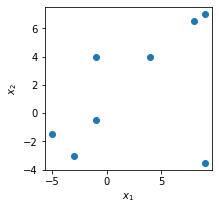

In [152]:
# Data 
X = np.array([
    [-5, -1.5],
    [-3, -3],
    [-1, -0.5],
    [-1, 4],
    [np.nan, 2],
    [4, 4],
    [8, 6.5],
    [9, 7],
    [9, -3.5],
])

i, j = np.argwhere(np.isnan(X))[0]

plt.figure(figsize=[3,3])
plt.scatter(X[:,0],X[:,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [101]:
help(np.nanmean)

Help on function nanmean in module numpy:

nanmean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)
    Compute the arithmetic mean along the specified axis, ignoring NaNs.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    For all-NaN slices, NaN is returned and a `RuntimeWarning` is raised.
    
    .. versionadded:: 1.8.0
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the means are computed. The default is to compute
        the mean of the flattened array.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs, the default
        is `fl

In [153]:
# Identify the row and column of the missing value
i, j = np.argwhere(np.isnan(X))[0]

# Initial imputation
# TODO: Impute the mean of the j-th column to replace the missing value. Hint: np.nanmean
# YOUR CODE HERE
X[i,j]=np.nanmean(X[:,j])

# TODO: Carry out PCA by completing the code below
pca = PCA(n_components=2).fit(X)
U = pca.components_.T
Lambda = pca.explained_variance_
# 1. Reconstruct the i-th row of X from the [1st] principal component
# 2. Impute the recontstructed value into X[i,j]
# YOUR CODE HERE
reconstruction = np.nanmean(X[:,j]) * U[:, 0].T
X[i, j] = reconstruction[j]


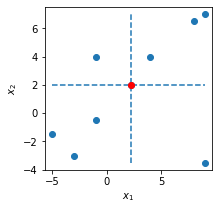

In [154]:
plt.figure(figsize=[3,3])
plt.scatter(X[:,0],X[:,1])
plt.hlines(X[i,1], min(X[:,0]), max(X[:,0]), linestyle='dashed')
plt.vlines(X[i,0], min(X[:,1]), max(X[:,1]), linestyle='dashed')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot(X[i,0],X[i,1],'ro');

## Load and Prepare Dataset (0 pts)

It is required to run this section of code to prepare and pre-process a dataset. But there is no task. You may skip ahead to the next Task below. 

In [ ]:
path = "/home/jovyan/shareddata/CSE204/Movie_Poster/"

**If and only if** you're running this locally ($\neq$ jupytercloud):

1. download the data from Moodle (both zip files) and store in the same directory as this notebook
1. unzip the folder
1. **uncomment the following cell** to load the data
1. **remember to comment it again before submitting** (tests will eventually crash and you won't get any point).

In [130]:
# path = "./"

In [131]:
files = []
for year in range(1980, 2016):  # loop through years
    encoding = 'utf-8' if year in [1980, 1981] else 'utf-16'
    with open(f'{path}groundtruth/{year}.txt', 'r', encoding=encoding) as f:  # open metadata file
        file = '[' + f.read() + ']'
        file = file.replace('}', '},')
        file = file.replace('ObjectId(', '')
        file = file.replace('),', ',')
        file = file.replace(',\n]', ']')
        data = json.loads(file)  # read metadata file
        files.append(pd.DataFrame(data)[['imdbID', 'Genre']])  # keep only interesting information
        
        
genres = pd.concat(files)  # concatenate all years in a single pandas DataFrame

# List all genres in the dataset
possible_genres = np.unique(list(itertools.chain.from_iterable(
    genres.Genre.str.split(', ').to_list())))

genres.set_index('imdbID', inplace=True)  # set _id as the DataFrame's index

# Create one boolean column for each genre and each movie
for genre in possible_genres:
    genres[genre] = genres.Genre.str.contains(genre) * 1
    
genres.drop(columns="Genre", inplace=True)
genres = genres[~genres.index.duplicated(keep='first')]

In [132]:
def train_test_split(subset: str = "train", max_size=4000):
    if subset == "train":
        start = 0
    else:
        start = 20
    images_loop = []
    images_ids = []
    increment_size = 3
    images = np.zeros((max_size, 200, 200, 3))
    compteur = 0
    for year in range(1980 + start, 1980 + start + 15):
        if year > 2005:
            continue
        for filename in os.listdir(f'{path}Movie_Poster_Dataset/{year}'):
            img = image.load_img(f'{path}Movie_Poster_Dataset/{year}/{filename}',
                                 target_size=(200, 200, 3))
            img = image.img_to_array(img)
            img = img / 255
            images[compteur, :, :, :] = img
            images_ids.append(filename.replace('.jpg', ''))
            compteur += 1
    return images[:compteur, :, :, :], np.array(images_ids)

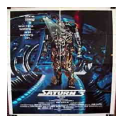

In [134]:
# Do not run this to many times due to memory leaks
gc.collect()
X_train, indices_train = train_test_split()
y_train = genres.loc[genres.index.isin(indices_train)].values
X_test, indices_test = train_test_split("test")
y_test = genres.loc[genres.index.isin(indices_test)].values
plt.figure(figsize=[2,2])
plt.imshow(X_train[0, :, :, :])
plt.axis('off');
X_train_reshaped = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test_reshaped = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

## 6.1 Auto Encoders (5 pts)

**Task 1:** Complete the convolutional auto-encoder (in `convolutional_autencoder` to the follow specification: 

* An encoder with:
    * An [`Input`](https://keras.io/api/layers/core_layers/input/) layer of `shape` `input_size`;
    * A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 16 3x3 filters for each channel, with `same` padding and `relu` activation;
    * A [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer of 4x4 `pool_size` with `same padding`;
    * A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 2 3x3 filters for each channel, with `same` padding and `relu` activation;
    * A [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer of 4x4 `pool_size` with `same padding`;
    * A [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer;
    * A [`Dense`](https://keras.io/api/layers/core_layers/dense/) layer with `code_size` nodes;
* A decoder with:
    * A [`Dense`](https://keras.io/api/layers/core_layers/dense/) layer with 338 nodes;
    * A [`Reshape`](https://keras.io/api/layers/reshaping_layers/reshape/) layer with `target_shape` of `(13, 13, 2)`;
    * A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 2 3x3 filters for each channel, with `same` padding and `relu` activation;
    * An [`UpSampling2D`](https://keras.io/api/layers/reshaping_layers/up_sampling2d/) layer with `size` 4x4;
    * A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 16 3x3 filters for each channel, with `relu` activation;
    * An [`UpSampling2D`](https://keras.io/api/layers/reshaping_layers/up_sampling2d/) layer with `size` 4x4;
    * A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 1 3x3 filters for each channel, with `same` padding and `sigmoid` activation.
* [Compile](https://keras.io/api/models/model_training_apis/) the resulting autoencoder with optimizer `Adam` and `mean_square_error` loss;
* Return the autoencoder and the encoder.

In [135]:
def convolutional_autoencoder(input_size, code_size: int):
    """
    Instanciate and compiles an autoencoder, returns both the autoencoder and just the encoder

    :param tuple input_size: shape of the input samples
    :param int code_size: size of the new representation space
    :return: autoencoder, encoder
    """
    # YOUR CODE HERE
    #Encoder:
    in_layer = Input(shape=input_size)
    conv_layer16=Conv2D(16, (3, 3), padding='same', activation='relu')(in_layer)
    maxpool_layer0=MaxPooling2D((4, 4), padding='same')(conv_layer16)
    conv_layer2=Conv2D(2, (3, 3), padding='same', activation='relu')(maxpool_layer0)
    maxpool_layer1=MaxPooling2D((4, 4), padding='same')(conv_layer2)
    flat_layer = Flatten()(maxpool_layer1)
    enc = Dense(code_size)(flat_layer)
    encoder = Model(in_layer, enc)
    #Decoder
    dense_layer0=Dense(338)(enc)
    reshape_layer=Reshape((13, 13, 2))(dense_layer0)
    conv2_decoder=Conv2D(2, (3, 3), padding='same', activation='relu')(reshape_layer)
    up_layer0=UpSampling2D(size=(4,4))(conv2_decoder)
    conv16_decoder=Conv2D(16, (3, 3), activation='relu')(up_layer0)
    up_layer1=UpSampling2D(size=(4,4))(conv16_decoder)
    final_layer=Conv2D(1, (3, 3), padding='same', activation='sigmoid')(up_layer1)
    autoencoder = Model(in_layer, final_layer)
    autoencoder.compile(optimizer='Adam', loss='mean_squared_error')
    
    return autoencoder, encoder

In [136]:
cnn_autoencoder, cnn_encoder = convolutional_autoencoder(X_train.shape[1:], 3)

Epoch 1/4
70/70 [==============================] - 31s 426ms/step - loss: 0.1096
Epoch 2/4
70/70 [==============================] - 30s 430ms/step - loss: 0.0931
Epoch 3/4
70/70 [==============================] - 31s 436ms/step - loss: 0.0847
Epoch 4/4
70/70 [==============================] - 30s 423ms/step - loss: 0.0803


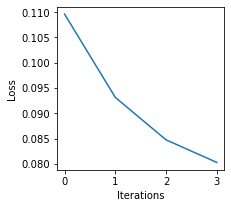

In [137]:
history = cnn_autoencoder.fit(X_train, X_train, epochs=4)
plt.figure(figsize=[3, 3])
plt.plot(history.history['loss']);
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [138]:
X_train_transformed_autoencoder = cnn_encoder.predict(X_train)
X_test_transformed_autoencoder = cnn_encoder.predict(X_test)
indices = np.random.randint(0, X_test_transformed_autoencoder.shape[0], 1000)

48/48 [==============================] - 2s 40ms/step


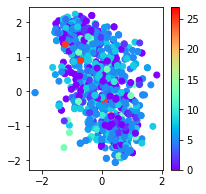

In [139]:
plt.figure(figsize=[3,3])
plt.scatter(X_test_transformed_autoencoder[indices, 0],
            X_test_transformed_autoencoder[indices, 1],
            c=np.argmax(y_train[indices, :], axis=1), cmap='rainbow')
plt.colorbar();

1/1 [==============================] - 0s 104ms/step


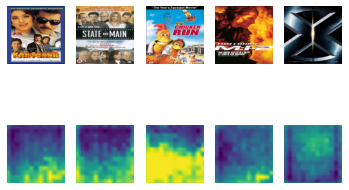

In [140]:
fig, ax = plt.subplots(2, 5)
new_data = cnn_autoencoder.predict(X_test[:6, :])

for i in range(5):
    ax[0, i].imshow(X_test[i, :])
    ax[1, i].imshow(new_data[i, :])
    ax[0, i].set_axis_off()
    ax[1, i].set_axis_off()

In [141]:
X = X_test_transformed_autoencoder[indices, 0:2]

## 6.2 K-Means Clustering (10 pts)

This task depends on the previous one, which would indeed be a natural workflow: come up with a good data representation, and then look for patterns and clusters in it.

**Task:** Implement k-Means clustering (you may use scikit-learn's `KMeans`) on the matrix `X`; store the cluster centers in `centers`. 

**Hint:** Don't be disappointed if results are not particularly insightful; such is the nature of data exploration -- we might not always get what we'd hope for. Also note: 

In [52]:
k = 3
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [59]:
# TODO: run k-means clustering (3 clusters), put the centers into the following variable

np.random.seed(1)
model=KMeans(n_clusters=k)
model.fit(X)
# YOUR CODE HERE
labels=model.labels_
centers = model.cluster_centers_
print("Centers=",centers)

Centers= [[-0.32772708  0.36237264]
 [ 0.65984714 -0.5023502 ]
 [ 0.5503227   0.22565241]]


In [57]:
assert(centers.shape[0] == k)
assert(centers.shape[1] == 2)

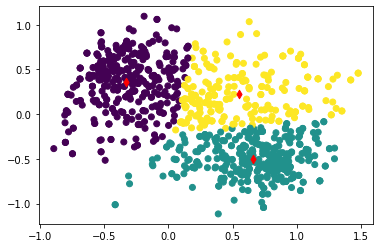

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='d')
plt.show()

## 7. CNNs and Deep Learning (15 pts) 

We will use CNNs for classification, to predict the genres of each movie given its poster. 

**Task:** Complete the following function by adding:
* A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 32 3x3 filters for each channel, with `same` padding and `relu` activation;
* A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 32 3x3 filters for each channel, with `same` padding and `relu` activation;
* A [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer of 4x4 `pool_size` with `same padding`;
* A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 32 3x3 filters for each channel, with `same` padding and `relu` activation;
* A [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer of 32 3x3 filters for each channel, with `same` padding and `relu` activation;
* A [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer of 4x4 `pool_size` with `same padding`;
* A [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer;
* A [`Dense`](https://keras.io/api/layers/core_layers/dense/) layer with 512 nodes and `relu` activation;
* A [`Dense`](https://keras.io/api/layers/core_layers/dense/) layer with `num_classes` nodes and `sigmoid` activation;
* [Compile](https://keras.io/api/models/model_training_apis/) the resulting model with optimizer `Adam` and `binary_crossentropy` loss;
* Return the resulting model.

In [69]:
help(Conv2D)

Help on class Conv2D in module keras.layers.convolutional.conv2d:

class Conv2D(keras.layers.convolutional.base_conv.Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28

In [70]:
def cnn_model(input_shape: tuple, num_classes: int):
    """
    Returns a compiled keras Conv2D model
    
    :param tuple input_shape: shape of ONE example as passed to the first layer
    :param int num_classes: number of output classes as passed to the last layer
    """
    model = tf.keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4),padding='same',))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.compile(optimizer="Adam", loss='binary_crossentropy')
    return model

In [71]:
model = cnn_model(X_train.shape[1:], y_train.shape[1])

Epoch 1/5
70/70 [==============================] - 62s 881ms/step - loss: 0.2150 - val_loss: 0.2307
Epoch 2/5
70/70 [==============================] - 61s 867ms/step - loss: 0.2136 - val_loss: 0.2314
Epoch 3/5
70/70 [==============================] - 61s 874ms/step - loss: 0.2100 - val_loss: 0.2360
Epoch 4/5
70/70 [==============================] - 62s 883ms/step - loss: 0.2054 - val_loss: 0.2361
Epoch 5/5
70/70 [==============================] - 61s 877ms/step - loss: 0.1947 - val_loss: 0.2509


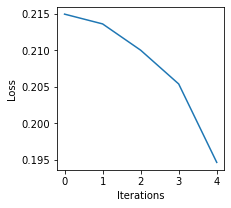

In [73]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=2, mode='auto')

history = model.fit(X_train, y_train, batch_size=32, epochs=5, 
    validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

plt.figure(figsize=[3,3])
plt.plot(history.history['loss']);
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [75]:
# Predict probabilities for each class on X_test
predictions_cnn = model.predict(X_test)

48/48 [==============================] - 7s 136ms/step


In [76]:
# Convert probabilities into decisions (class membership) with 0.5 threshold
cnn_decisions = (predictions_cnn > 0.5) * 1

In [77]:
# Compute error rates per class
error_rates_cnn = np.sum(np.abs(y_test - cnn_decisions), axis=0) / y_test.shape[0]
error_rates_cnn

array([0.19960604, 0.        , 0.13066316, 0.03676953, 0.05975049,
       0.43532502, 0.21208142, 0.09455023, 0.48128693, 0.06040709,
       0.06040709, 0.        , 0.03086014, 0.06040709, 0.07485227,
       0.02429416, 0.07025607, 0.00328299, 0.        , 0.        ,
       0.24031517, 0.04399212, 0.00525279, 0.03348654, 0.        ,
       0.11621799, 0.02363756, 0.00590939])